### Module Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### function to get region of restaurant

In [2]:
# ncr cities
ncr_cities = ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']

def get_region(city):
    if city in ncr_cities:
        return 'Delhi-NCR'
    else:
        return 'Rest of India'

### Load data related to india

In [3]:
df = pd.read_csv('zomato.csv')
# df

In [4]:
df = df[df['Country Code'] == 1]
df['Region'] = df['City'].apply(get_region)
df.reset_index(drop=True, inplace=True)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Region
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,Rest of India
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,Rest of India
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,Rest of India
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,Rest of India
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,Rest of India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",...,No,No,No,No,2,3.6,Yellow,Good,193,Rest of India
8648,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.000000,"Cafe, North Indian, Chinese",...,No,No,No,No,2,3.7,Yellow,Good,85,Rest of India
8649,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.315281,17.719539,"Burger, Pizza, Biryani",...,No,No,No,No,2,4.3,Green,Very Good,172,Rest of India
8650,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,No,No,No,No,4,3.8,Yellow,Good,74,Rest of India


# 1.) Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India

### use value_counts() method on 'Region' Column

In [5]:
result = df['Region'].value_counts()
result

Delhi-NCR        7947
Rest of India     705
Name: Region, dtype: int64

## Plot the graph

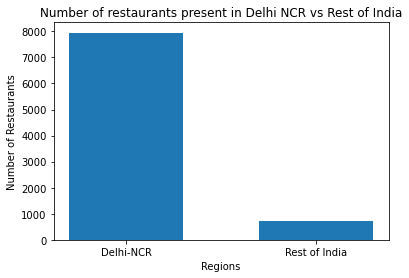

In [6]:
plt.bar(result.index, result.values, width=0.6)

plt.xlabel('Regions')
plt.ylabel('Number of Restaurants')

plt.title('Number of restaurants present in Delhi NCR vs Rest of India')
plt.show()

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# 2.) Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.

### Create two sets that store cuisines of ncr and rest of india

In [7]:
ncr_cuisines = set()
rest_cuisines = set()

In [8]:
for i in range(len(df.index)):
    region = df.iloc[i].Region
    cuisines = df.iloc[i].Cuisines.strip()
    
    for cuisine in cuisines.split(','):
        cuisine = cuisine.strip()
        
        if region == 'Delhi-NCR':
            ncr_cuisines.add(cuisine)
        else:
            rest_cuisines.add(cuisine)

*cuisines which are not present in restaurant of Delhi NCR but present in rest of India* = ***rest_cuisines - ncr_cuisines***

In [9]:
rest_cuisines_but_not_ncr_cuisines = rest_cuisines.difference(ncr_cuisines)

print('Cuisines served in India except Delhi-NCR region are: ', end='')
print(rest_cuisines_but_not_ncr_cuisines)

Cuisines served in India except Delhi-NCR region are: {'German', 'BBQ', 'Malwani', 'Cajun'}


# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# 3.) Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

## Top 10 Cuisines in NCR

### Load data related to ncr region only

In [10]:
ncr_df = df[df['Region'] == 'Delhi-NCR']
ncr_cuisines_df = ncr_df['Cuisines']
ncr_cuisines_df

241     Chinese, Fast Food, Bakery
242          North Indian, Chinese
243                   North Indian
244                   North Indian
245                         Bakery
                   ...            
8484         North Indian, Chinese
8485                     Fast Food
8486                     Fast Food
8487         North Indian, Chinese
8488          Raw Meats, Fast Food
Name: Cuisines, Length: 7947, dtype: object

### Create a dictionary and store cuisines as key and their count as value.

In [11]:
ncr_cuisines_count_map = {}
for cuisines in ncr_cuisines_df:
    for cuisine in cuisines.split(','):
        cuisine = cuisine.strip()
        ncr_cuisines_count_map[cuisine] = ncr_cuisines_count_map.get(cuisine, 0) +1
        
ncr_cuisines_count_map

{'Chinese': 2448,
 'Fast Food': 1866,
 'Bakery': 697,
 'North Indian': 3597,
 'Mithai': 379,
 'Mughlai': 933,
 'Cafe': 491,
 'Raw Meats': 114,
 'Burger': 152,
 'South Indian': 569,
 'Gujarati': 8,
 'Rajasthani': 14,
 'Thai': 176,
 'Desserts': 542,
 'American': 193,
 'Salad': 89,
 'Healthy Food': 143,
 'Ice Cream': 210,
 'Continental': 547,
 'Beverages': 204,
 'Italian': 535,
 'Pizza': 282,
 'Street Food': 538,
 'Mexican': 80,
 'Juices': 23,
 'Asian': 151,
 'Seafood': 53,
 'Biryani': 160,
 'Mediterranean': 60,
 'Finger Food': 92,
 'Kerala': 15,
 'Japanese': 75,
 'Lebanese': 57,
 'Tea': 38,
 'Belgian': 1,
 'Kashmiri': 20,
 'Sushi': 21,
 'European': 87,
 'South American': 2,
 'Burmese': 6,
 'Persian': 1,
 'Arabian': 15,
 'Steak': 1,
 'Bengali': 27,
 'Modern Indian': 9,
 'Portuguese': 5,
 'African': 4,
 'Parsi': 7,
 'Iranian': 3,
 'Malaysian': 15,
 'Vietnamese': 12,
 'Greek': 2,
 'Lucknowi': 12,
 'Tibetan': 41,
 'Korean': 15,
 'Awadhi': 10,
 'Hyderabadi': 23,
 'Nepalese': 9,
 'Drinks Only'

### Extract Top 10 cuisines from dictionary based on count

In [12]:
top_10_ncr_cuisines = np.array(sorted(ncr_cuisines_count_map.items(), key = lambda x: x[1], reverse = True)[:10])
print('Top 10 Cuisines of Delhi NCR are:')
print(top_10_ncr_cuisines)

Top 10 Cuisines of Delhi NCR are:
[['North Indian' '3597']
 ['Chinese' '2448']
 ['Fast Food' '1866']
 ['Mughlai' '933']
 ['Bakery' '697']
 ['South Indian' '569']
 ['Continental' '547']
 ['Desserts' '542']
 ['Street Food' '538']
 ['Italian' '535']]


In [13]:
top_10_ncr_cuisines_name = top_10_ncr_cuisines[:, 0]
top_10_ncr_cuisines_count = top_10_ncr_cuisines[:, 1].astype(int)

## Plot the graph

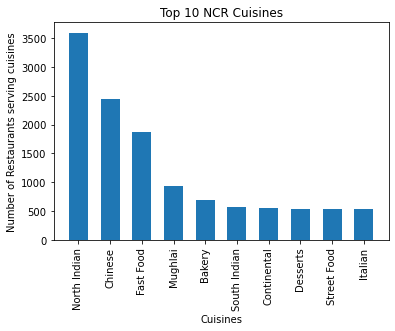

In [14]:
plt.bar(top_10_ncr_cuisines_name, top_10_ncr_cuisines_count, width=0.6)
plt.xticks(rotation=90)

plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants serving cuisines')

plt.title('Top 10 NCR Cuisines')
plt.show()

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

## Top 10 Cuisines in Rest of India

### Load data related to rest of India region only

In [15]:
rest_df = df[df['Region'] == 'Rest of India']
rest_cuisines_df = rest_df['Cuisines']
rest_cuisines_df.reset_index(drop=True, inplace=True)
# rest_cuisines_df

### Create a dictionary and store cuisines as key and their count as value.

In [16]:
rest_cuisines_count_map = {}
for cuisines in rest_cuisines_df:
    for cuisine in cuisines.split(','):
        cuisine = cuisine.strip()
        rest_cuisines_count_map[cuisine] = rest_cuisines_count_map.get(cuisine, 0) +1
        
rest_cuisines_count_map

{'North Indian': 349,
 'Mughlai': 59,
 'Rajasthani': 6,
 'Chinese': 242,
 'European': 32,
 'Gujarati': 3,
 'Continental': 177,
 'South Indian': 62,
 'Desserts': 55,
 'Cafe': 136,
 'Italian': 147,
 'Mexican': 50,
 'Pizza': 31,
 'Fast Food': 97,
 'Mediterranean': 30,
 'Thai': 29,
 'Ice Cream': 6,
 'Beverages': 12,
 'Asian': 35,
 'Street Food': 16,
 'Sandwich': 1,
 'Burger': 13,
 'Healthy Food': 3,
 'American': 32,
 'Armenian': 1,
 'Salad': 3,
 'Bakery': 29,
 'Mithai': 1,
 'Biryani': 15,
 'Juices': 3,
 'Maharashtrian': 4,
 'Hyderabadi': 2,
 'Modern Indian': 7,
 'Finger Food': 17,
 'Tex-Mex': 7,
 'Arabian': 5,
 'Charcoal Grill': 3,
 'Steak': 1,
 'Seafood': 28,
 'Tea': 6,
 'Japanese': 7,
 'Malaysian': 3,
 'Burmese': 4,
 'Chettinad': 3,
 'Spanish': 2,
 'Greek': 3,
 'Indian': 2,
 'Parsi': 1,
 'Tibetan': 3,
 'French': 6,
 'Goan': 13,
 'German': 2,
 'Andhra': 7,
 'Bengali': 2,
 'Awadhi': 1,
 'Lebanese': 8,
 'Kerala': 7,
 'Middle Eastern': 2,
 'Lucknowi': 1,
 'Portuguese': 1,
 'African': 1,
 'Ma

### Extract Top 10 cuisines from dictionary based on count

In [17]:
top_10_rest_cuisines = np.array(sorted(rest_cuisines_count_map.items(), key = lambda x: x[1], reverse = True)[:10])
print('Top 10 Cuisines of India except Delhi-NCR Region are:')
print(top_10_rest_cuisines)

Top 10 Cuisines of India except Delhi-NCR Region are:
[['North Indian' '349']
 ['Chinese' '242']
 ['Continental' '177']
 ['Italian' '147']
 ['Cafe' '136']
 ['Fast Food' '97']
 ['South Indian' '62']
 ['Mughlai' '59']
 ['Desserts' '55']
 ['Mexican' '50']]


In [18]:
top_10_rest_cuisines_name = top_10_rest_cuisines[:, 0]
top_10_rest_cuisines_count = top_10_rest_cuisines[:, 1].astype(int)

## Plot the graph

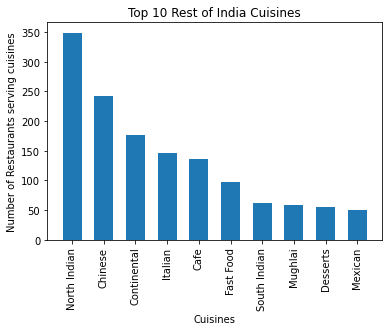

In [19]:
plt.bar(top_10_rest_cuisines_name, top_10_rest_cuisines_count, width=0.6)
plt.xticks(rotation=90)

plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants serving cuisines')

plt.title('Top 10 Rest of India Cuisines')
plt.show()

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# 4.) Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

## a.) Number of Cuisines in both region

In [20]:
print('Total number of Cuisines served in Delhi-NCR Region is:', len(ncr_cuisines_count_map.keys()))
print('Total number of Cuisines served in Rest of India Region is:', len(rest_cuisines_count_map.keys()))

Total number of Cuisines served in Delhi-NCR Region is: 86
Total number of Cuisines served in Rest of India Region is: 70


## b.) Unique Cuisines served in one region but not in another region

In [21]:
print('Unique Cuisines served in Delhi NCR Region, but not in Rest of India:-')
print(ncr_cuisines.difference(rest_cuisines))
print()

print('-----------------------------------------------------------------------')
print()

print('Unique Cuisines served in Rest of India Region, but not in Delhi-NCR:-')
print(rest_cuisines.difference(ncr_cuisines))

Unique Cuisines served in Delhi NCR Region, but not in Rest of India:-
{'Bihari', 'Cuisine Varies', 'Deli', 'Sri Lankan', 'Oriya', 'Turkish', 'Naga', 'Persian', 'Assamese', 'Drinks Only', 'Moroccan', 'South American', 'Pakistani', 'Belgian', 'Nepalese', 'Kashmiri', 'Iranian', 'Sushi', 'Afghani', 'Raw Meats'}

-----------------------------------------------------------------------

Unique Cuisines served in Rest of India Region, but not in Delhi-NCR:-
{'German', 'BBQ', 'Malwani', 'Cajun'}


## c.) Comparison of common cuisines in top 10 cusinies of both region using graphs

###### Note I have hard-coded below data by seeing data from above, (it may change if data got updated from zomato api)

In [22]:
common_cuisines = np.array(['North Indian', 'Chinese', 'Continental', 'Italian', 'Fast Food', 'South Indian', 'Mughlai', 'Desserts'])
common_cuisines_ncr_count = np.array([3597, 2448, 547, 535, 1866, 569, 933, 542])
common_cuisines_rest_count = np.array([349, 242, 177, 147, 97, 62, 59, 55])

In [23]:
print('Common Cuisines among top 10 cuisines of each region are: ')
print(*common_cuisines, sep=',\t')

Common Cuisines among top 10 cuisines of each region are: 
North Indian,	Chinese,	Continental,	Italian,	Fast Food,	South Indian,	Mughlai,	Desserts


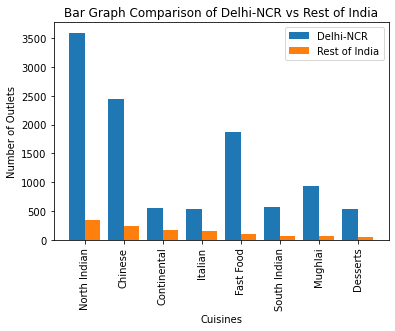

In [24]:
# plotting bar graph
xt = np.arange(len(common_cuisines))
  
plt.bar(xt - 0.2, common_cuisines_ncr_count, 0.4, label = 'Delhi-NCR')
plt.bar(xt + 0.2, common_cuisines_rest_count, 0.4, label = 'Rest of India')
  
plt.xticks(xt, common_cuisines,rotation=90)
plt.xlabel("Cuisines")
plt.ylabel("Number of Outlets")
plt.title("Bar Graph Comparison of Delhi-NCR vs Rest of India")
plt.legend()
plt.show()

In [25]:
print('Above bar graph shows the number of outlets for each Cuisine.')
print("But this data is highly skewed toward the cities included in Delhi-NCR.")
print('So I plot two pie chart based of weightage percentage of each Cuisine based on regions.')
print()
print()
print('Outlet percentage = (Number of Outlets for particular Cuisine) / (Total Number of Outlets)')

Above bar graph shows the number of outlets for each Cuisine.
But this data is highly skewed toward the cities included in Delhi-NCR.
So I plot two pie chart based of weightage percentage of each Cuisine based on regions.


Outlet percentage = (Number of Outlets for particular Cuisine) / (Total Number of Outlets)


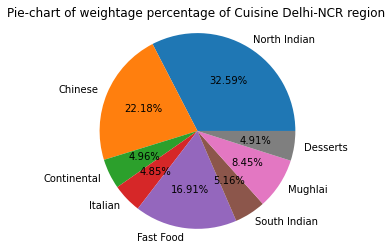

In [26]:
plt.pie(common_cuisines_ncr_count/len(ncr_cuisines_count_map.keys()), labels = common_cuisines, autopct = '%.2f%%')
plt.axis('equal')
plt.title('Pie-chart of weightage percentage of Cuisine Delhi-NCR region')

plt.show()

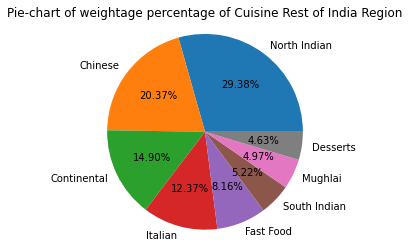

In [27]:
plt.pie(common_cuisines_rest_count/len(rest_cuisines_count_map.keys()), labels = common_cuisines, autopct = '%.2f%%')
plt.axis('equal')
plt.title('Pie-chart of weightage percentage of Cuisine Rest of India Region')

plt.show()

In [28]:
print('By seeing above two pie chart we can conclude that:-')
print('1.) "North Indian, Chinese, South Indian and Desserts" are almost served in same proportion in both regions.')
print('2.) "Continental and Italian" are served comparatively higher in Rest of India Region.')
print('3.) "Fast Food and Mughlai" are served comparatively higher in Delhi-NCR Region.')

By seeing above two pie chart we can conclude that:-
1.) "North Indian, Chinese, South Indian and Desserts" are almost served in same proportion in both regions.
2.) "Continental and Italian" are served comparatively higher in Rest of India Region.
3.) "Fast Food and Mughlai" are served comparatively higher in Delhi-NCR Region.


# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||